## Import the Necessary Libarries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree


## load the Mushroom Data set

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data[['class']].value_counts()
# Not an Imbalanced dataset

class
e        4208
p        3916
dtype: int64

## Converting Categorical features to Numerical - Label Encoder

In [6]:
#Convert categories to numbers using one hot encoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for col in data.columns:
    data[col]=lb.fit_transform(data[col])

In [7]:
X=data.drop(columns=['class'])
y=data[['class']]

In [8]:
#Split train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=4)

## Model - Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_leaf_nodes=10)

In [10]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [11]:
y_pred = model.predict(x_test)

## Model - Evaluation

In [12]:
print(confusion_matrix(y_test,y_pred))


[[817  28]
 [ 12 768]]


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       845
           1       0.96      0.98      0.97       780

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



## Visualsing the Decision Tree

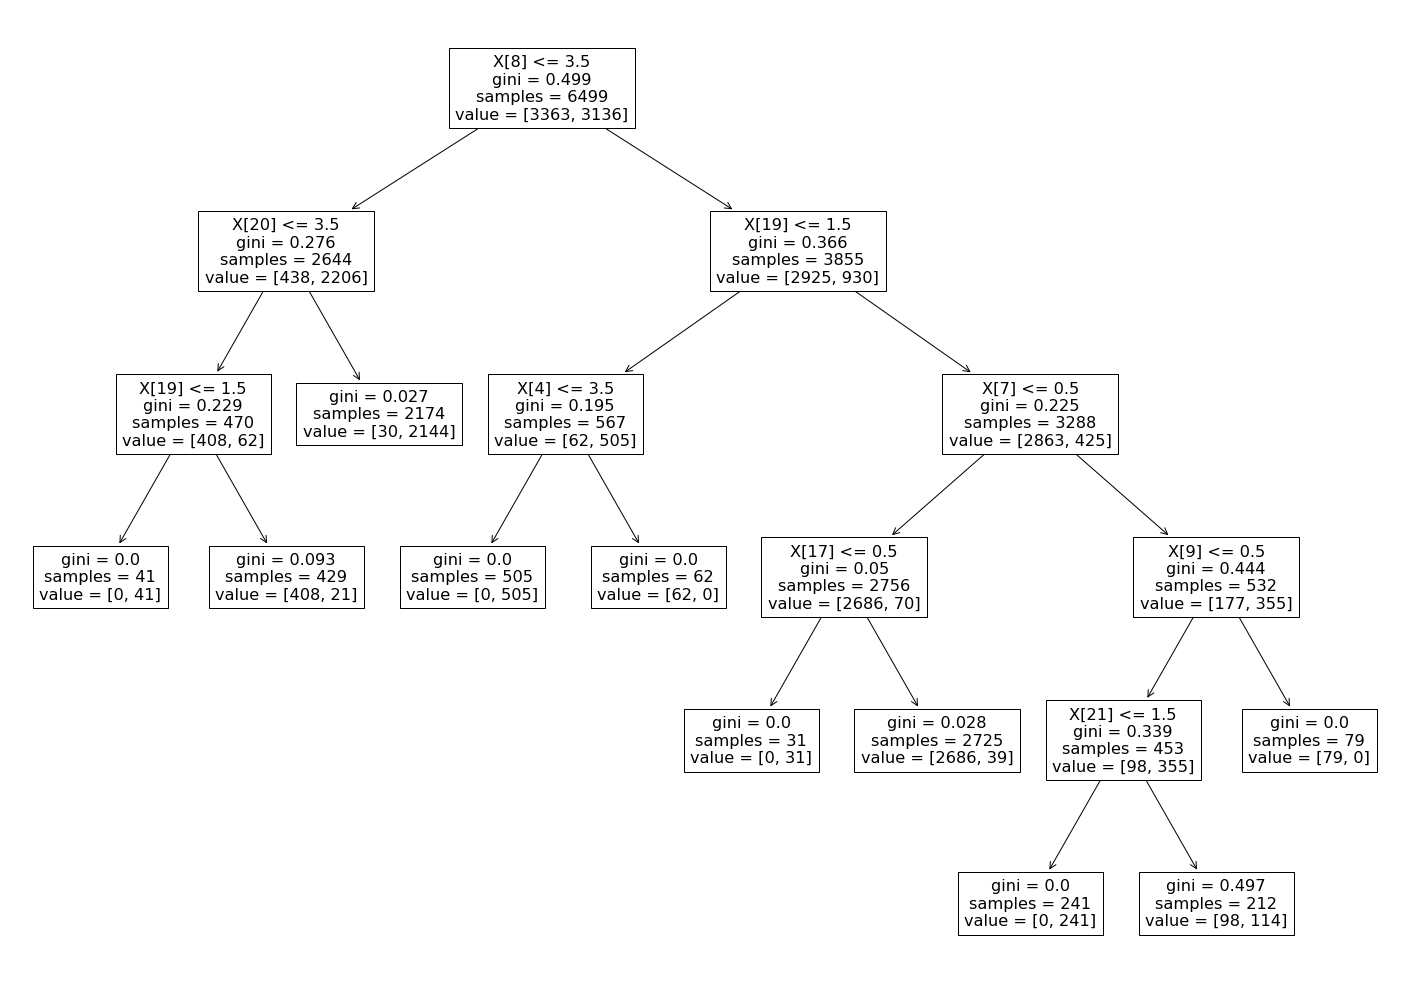

In [14]:
plt.rcParams["figure.figsize"] = (25,18)

tree.plot_tree(model);